# Libraries 

In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold

In [34]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Helper functions 

In [2]:
def gender_to_number(gender: str) -> int:
    
    if gender == 'female':
        return 1
    else:
        return 0

# Data 

In [3]:
train = pd.read_csv('data/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('data/test.csv')

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Solution

## Data preparation

In [7]:
train['Sex_binary'] = train['Sex'].map(gender_to_number)

In [30]:
features = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
X = train[features]
y = train['Survived']

In [31]:
X = X.fillna(-1)

In [10]:
#np.random.seed(0)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)

## Training model 

In [11]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [32]:
# Cross validation 
accuracy_results = []
    
kfold = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for index_train_rows, index_val_rows in kfold.split(X):

    # Get train and validation data using index
    X_train, X_val = X.iloc[index_train_rows], X.iloc[index_val_rows]
    y_train, y_val = y.iloc[index_train_rows], y.iloc[index_val_rows]

    # Train model
    model.fit(X_train, y_train)

    # Model prediction
    predictions = model.predict(X_val)
    accuracy = np.mean(y_val == predictions)
    accuracy_results.append(accuracy)

print('Accuracy mean', np.mean(accuracy_results))

Accuracy mean 0.8041457147175896


(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

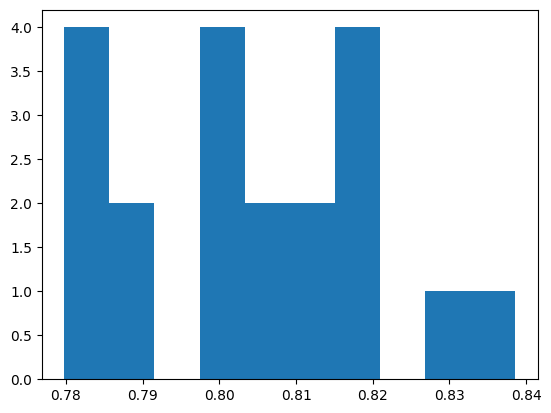

In [35]:
pylab.hist(accuracy_results)

## Submission 

In [15]:
predictions = pd.Series(predictions, index=test['PassengerId'], name='Survived')
#predictions.to_csv('predictions.csv', header=True)

ValueError: Length of values (446) does not match length of index (418)